In [1]:
import numpy as np

class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.
    
    Parameters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training datset.
    random_state: int
        Random number generator seed for random weight initialization.
        
    Attributes
    -----------
    w_: 1d-array
        Weights after training.
    cost_: list
        Sum-of-squares cost function value in each epoch.
        
    """

    def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_smaples, n_features]
            Training vectors, where n_smaples is the number of samples and n_features is the number of features
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self: Object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0:] += self.eta * errors.sum()
            
            # Important note - that we compute the logistic 'cost' now
            # instead of the sum of squared errors cost 
            cost = (-y.dot(np.log(output)) - ((1 -y).dot(np.log(1 - output))))
            self.cost_.append(cost)
            
            return self
        
    def net_input(self, X):
        """ 
        Calculate net input.
        
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def activation(self, z):
        """
        Calculate logistics sigmoid activation
            
        """
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))
        
    def predict(self, X):
        """
        Return class label after unit step
            
        """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    


In [2]:
import pandas as pd 

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data',
                 header = None)
df.tail()

## tail() function is used to get the last n rows. This function returns last n rows from the object based on position.

print(type(df))

df

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


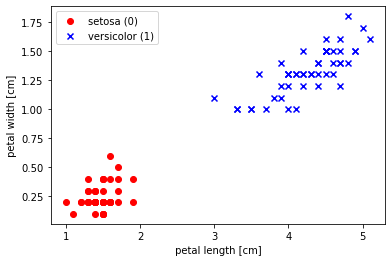

In [3]:
# Data Visualization
import matplotlib.pyplot as plt

# select setosa and versicolor
y = df.iloc[0:100, 4].values     #iloc[row, col].values - in the form of array; without ".values" - it will be list
y = np.where(y == 'Iris-setosa', 0, 1)

## loc in Pandas is label-based, which means that we have yo specify the name of the rows and cols that we need to filter out whereas 
## iloc in Pnadas is integer index- based, we have to specify rows and cols by their integer index.

# extract petal length and petal width
X = df.iloc[0:100,[2,3]].values

# plot data

plt.scatter(X[:50, 0], X[:50, 1],
            color = 'red', marker = 'o', label = 'setosa (0)')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color = 'blue', marker = 'x', label = 'versicolor (1)')

plt.xlabel(' petal length [cm] ')
plt.ylabel(' petal width [cm] ')

plt.legend(loc = 'upper left')
plt.show()

# Standarization can easily be achieved using the built-in NumPy methods "mean" and "std"
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()


In [4]:
# Plot the convergence for the algorithm
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
## determine the minimum and maximum values for the two features 
## and use those features vectors to create a pair of grid arrays xx1 and xx2

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
## Since we trained preceptron classifier on two feature dimensions, we 
## need to flatten the grid arrays and create a matrix that has the same 
## number of columns as the Iris training subset so that we can use the 
## predict method to predict the class labels Z of the corresponding grid points.

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '', edgecolor = 'black', alpha = 1.0,
                    linewidth = 1, marker = 'o', s = 100, label = 'test set')

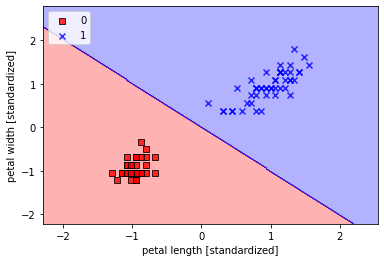

In [5]:
X_train_01_subset = X_std[(y == 0) | (y == 1)]
y_train_01_subset = y[(y == 0) | (y == 1)]
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset, classifier = lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()